# Bilder klassificeras med hjälp av k nearest neighbors

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_confusion_matrix,accuracy_score


In [3]:

train_sampel_data_df = pd.read_csv("/Users/ahmadzarzar/Maskin_lärning_kurs/Deep lärning Linjär_reg/CSV/train_sample.csv")

test_sampel_data_df = pd.read_csv("/Users/ahmadzarzar/Maskin_lärning_kurs/Deep lärning Linjär_reg/CSV/test_sample.csv")

train_sampel_2_data_df = pd.read_csv("/Users/ahmadzarzar/Maskin_lärning_kurs/Deep lärning Linjär_reg/CSV/train_sample_2.csv")

test_sampel_2_data_df = pd.read_csv("/Users/ahmadzarzar/Maskin_lärning_kurs/Deep lärning Linjär_reg/CSV/test_sample_2.csv")

## Data analys 

Den första dataset innehåller 5 datapunkter och 785 attributer i båda träning och testing data
men den andra innehåller samma antal datapunkter dvs 5 men i träningdata har det 782 attributer och i testingdata har det 785 attributer

In [4]:
train_sampel_data_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
test_sampel_data_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
train_sampel_2_data_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
test_sampel_2_data_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Välj dataset
Dessa dataset som vi jobbar med just nu är inte samma dataset som vi har använt tidigare efter data analyser som jag gjorde så väljer jag train_sampel dataset för att jag anser att den har bäst kvalitet eftersom om vi jämför varje dataset med träning och testingdata och kollar hur många attributer eller rader dessa har? så ser vi att dataset sampel_2 har olika attributer om man kollar på testing och träning så ser man att det har träningen 782 attributer annars i testing så har det 785 attributer och här ser vi att det finns lite fel i datan så därför väljer jag den första dataset sampel_train alltså.

### Hur många klasser finns det?

In [40]:
train_label = train_sampel_data_df['label'].unique()
print(f'Det finns {len(train_label)} klasser')

Det finns 10 klasser


## Rita ut minst en variant av varje siffra som en bild på siffran

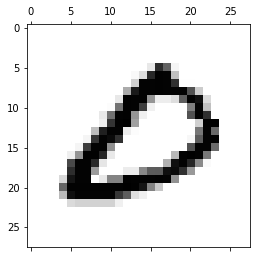

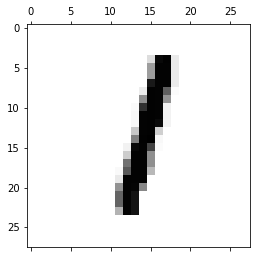

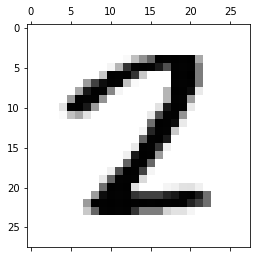

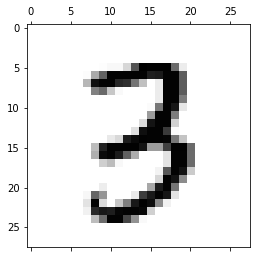

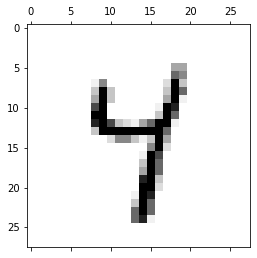

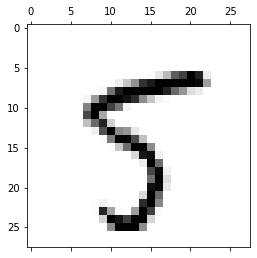

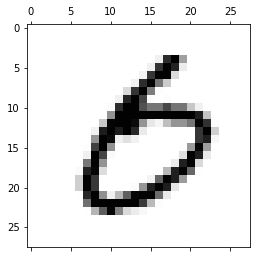

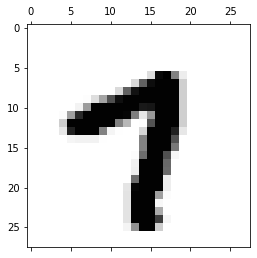

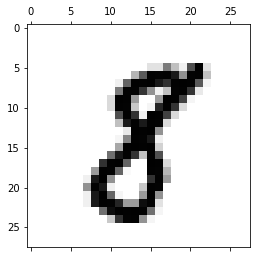

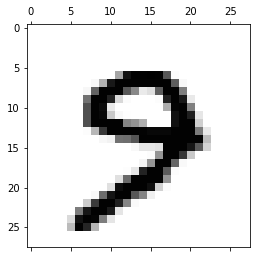

In [60]:
for i in train_label:

    klass_bild = train_sampel_data_df[train_sampel_data_df['label']==i].sample()

    klass_bild = klass_bild.drop(columns=["label"])

    bild_visulisering = klass_bild.values.reshape(1,28,28)

    plt.matshow(bild_visulisering[0], cmap=plt.cm.Greys)


# Träning en k-nearest neighbors modell 

In [10]:
x_train=train_sampel_data_df.drop(columns=['label'])
y_train=train_sampel_data_df.label

x_test =test_sampel_data_df.drop(columns=['label'])
y_test= test_sampel_data_df.label


### Vad har du för värde på k?

### Vad får modellen för testscore?

In [66]:

k_nub_lista=[1,2,3,4,10,20,30,40,50,100,200,300,5]

for k in k_nub_lista:
    print(f'K värde är nu ***{k}***')
    neigh = KNeighborsClassifier(n_neighbors = k).fit(x_train,y_train)
    test= neigh.score(x_test,y_test)
    pre= neigh.predict(x_test)
    print(f'Testsocre är {test}')


K värde är nu ***1***
Testsocre är 0.934
K värde är nu ***2***
Testsocre är 0.924
K värde är nu ***3***
Testsocre är 0.945
K värde är nu ***4***
Testsocre är 0.938
K värde är nu ***10***
Testsocre är 0.928
K värde är nu ***20***
Testsocre är 0.929
K värde är nu ***30***
Testsocre är 0.915
K värde är nu ***40***
Testsocre är 0.909
K värde är nu ***50***
Testsocre är 0.903
K värde är nu ***100***
Testsocre är 0.868
K värde är nu ***200***
Testsocre är 0.798
K värde är nu ***300***
Testsocre är 0.773
K värde är nu ***5***
Testsocre är 0.945


### Skapa en confusion matrix för att se hur modellen klassificerar

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


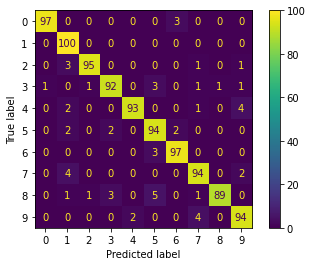

In [12]:
plot_confusion_matrix(neigh, x_test, y_test)  
plt.show()


Som vi ser när vi har tränat vår modell och när n_neighbors värde är 5 så får vi i testscore 0.94 vilket är ganska bra men modellen har ändå svårt att klassificera några klasser så om vi kollar på 9 i predicted label axeln så kolla vi uppåt så ser vi att den gissade 2 gånger på 9 när den var 7 och gissade 4 gånger på 9 när den var 4 eller om vi väljer 3 i predicted label axeln istellet så hittar vi att den gissade 3 gånger på 3 när den var 8 så det är inte så mycket men den har ändå svårt för några klasser att klassificera. 

### Skriv en egen funktion så att de k närmsta grannarna ritas ut för en prediktion.


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


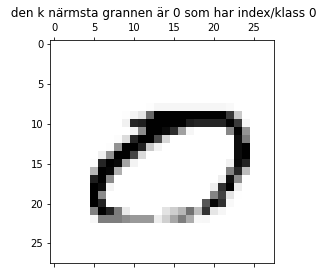

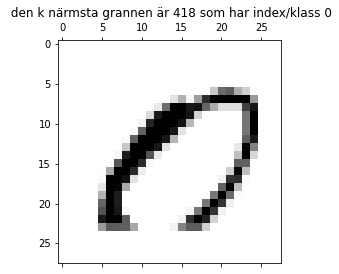

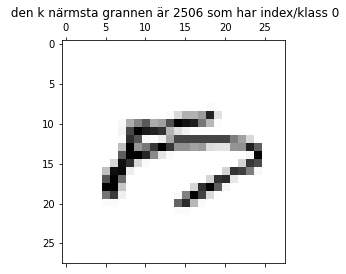

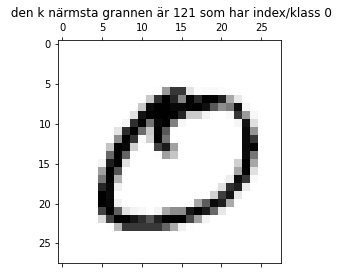

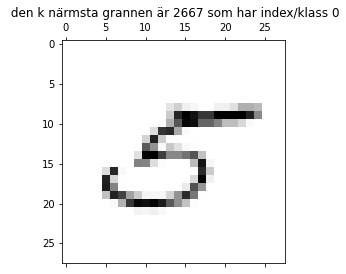

In [37]:
def k_n_g(data):
    närmast_granar = neigh.kneighbors([data],return_distance=False)

    for i in närmast_granar[0]:
        index_grannen_bild = x_train.iloc[i]
        rita_bild = index_grannen_bild.values.reshape(1,28,28)
        plt.matshow(rita_bild[0], cmap=plt.cm.Greys)
        plt.title(f' den k närmsta grannen är {i} som har index/klass {index_grannen_bild[0]}')

k_n_g(x_train.iloc[0])




# Väl Godkänt:


## KNN från grunden

In [14]:
def ED(x_1, x_2):  
    return np.sqrt(np.sum((x_1 - x_2) **2))   


class KNN():
    def __init__(self,k) -> None:
        self.k = k
        
    def fit(self,X,y):
        self.X_träin = X 
        self.y_träin = y


    def predict(self,X):
        y_pred = [self.predict_most_common(x) for x in X.values ]
        return np.array(y_pred)
    

    def predict_most_common(self,x):
        
        distance = [ED(x, x_tr) for x_tr in self.X_träin.values]
        
        k_index = np.argsort(distance)[:self.k]

        k_neigbers_labels = [self.y_träin[c] for c in k_index]

        most_commo = Counter(k_neigbers_labels).most_common(1)

        return most_commo[0][0]       

In [19]:

k_nub_lista=[1,2,3,4,5,10,20,30,40,50,100,200]

for h in k_nub_lista:
    print(f'K värde är nu ***{h}***')
    cls = KNN(k = h)
    cls.fit(x_train,y_train)
    y_predict=cls.predict(x_test)
    tes= accuracy_score(y_test,y_predict)
    print(tes)
  

K värde är nu ***1***
0.934
K värde är nu ***2***
0.934
K värde är nu ***3***
0.941
K värde är nu ***4***
0.945
K värde är nu ***5***
0.942
K värde är nu ***10***
0.928
K värde är nu ***20***
0.925
K värde är nu ***30***
0.917
K värde är nu ***40***
0.91
K värde är nu ***50***
0.903
K värde är nu ***100***
0.871
K värde är nu ***200***
0.8


### Får du samma resultat som i godkänt? Eller skiljer det sig på något vis? I så fall, hur?


Det skiljer inte sig så mycket faktiskt om vi kollar när k värde är 1 så får vi resultat på 0.934 från sklearn modellen och när k är 1 från egen KNN så får vi resultat på 0.934 så om vi jämför när kvärde är 1 så det skiljer inte sig men när k är 2 så får vi från sklearn  0.924 men från egen KNN så får vi samma resultat som vi fick när k värde var 1 om vi tiitar vidare på andra värden typ när k värde är 4 k värde dvs att det är n_neighbors i alla fall så när k är 4 så får vi från sklearn modellen 0.938 och från egen modellen får vi 0.945 så egentligen det skiljer sig fast jätte jätte lite skillnad samt som ni har säkert märkt själva så högre värde vi anger i k så lägre resultat det blir i testscore.